Размер train: 80, размер test: 20


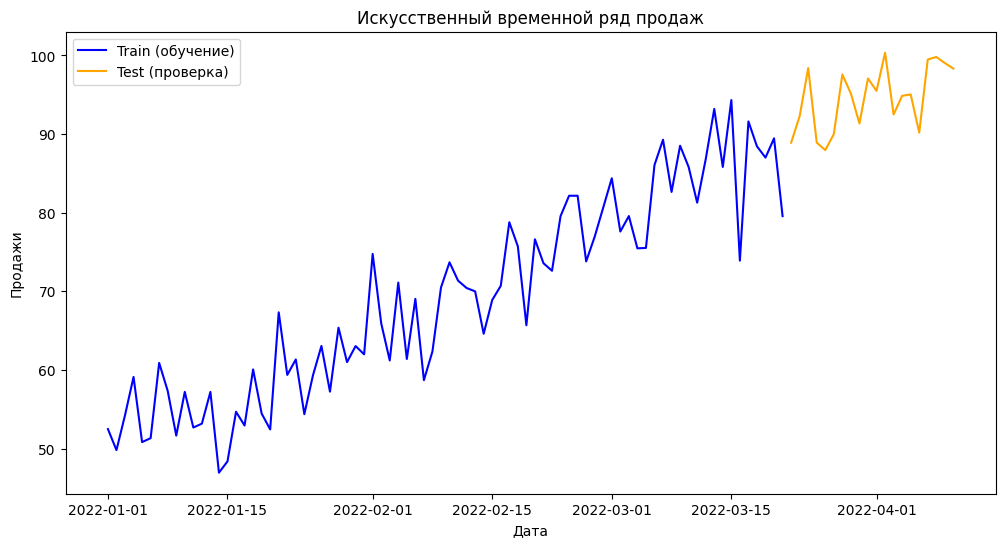

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
# Создадим данные: тренд + случайный шум
np.random.seed(42)
dates = pd.date_range(start='2022-01-01', periods=100, freq='D')
sales = 50 + np.arange(100) * 0.5 + np.random.normal(scale=5, size=100)
 
df = pd.DataFrame({'date': dates, 'sales': sales})
df.set_index('date', inplace=True)
 
# Деление по времени
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
 
print(f"Размер train: {len(train)}, размер test: {len(test)}")
 
plt.figure(figsize=(12,6))
 
# Train
plt.plot(train.index, train['sales'], label='Train (обучение)', color='blue')
 
# Test
plt.plot(test.index, test['sales'], label='Test (проверка)', color='orange')
 
# Оформление
plt.title("Искусственный временной ряд продаж")
plt.xlabel("Дата")
plt.ylabel("Продажи")
plt.legend()
plt.show()

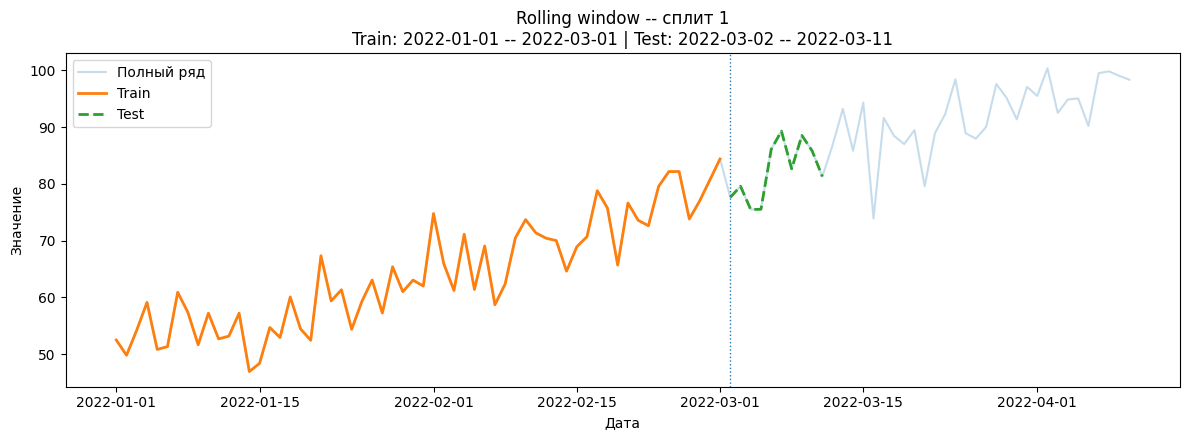

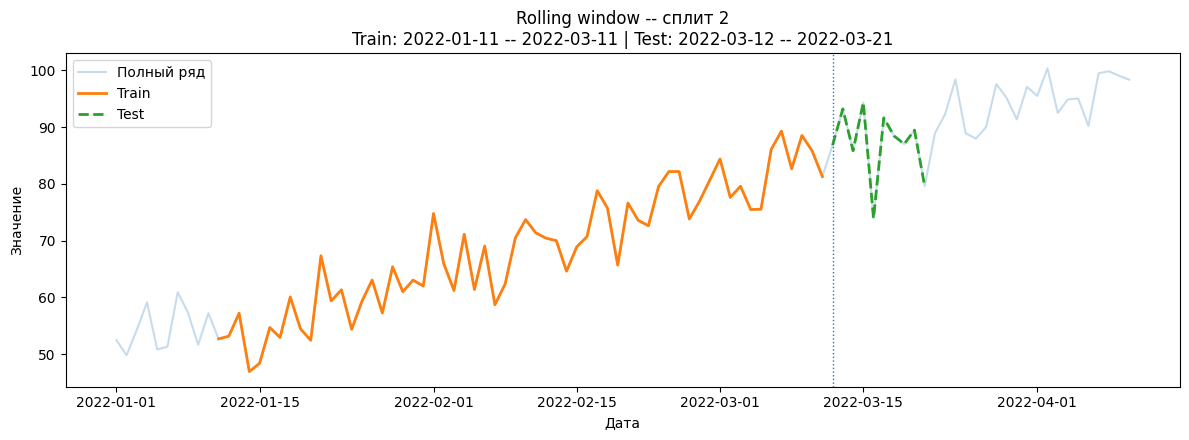

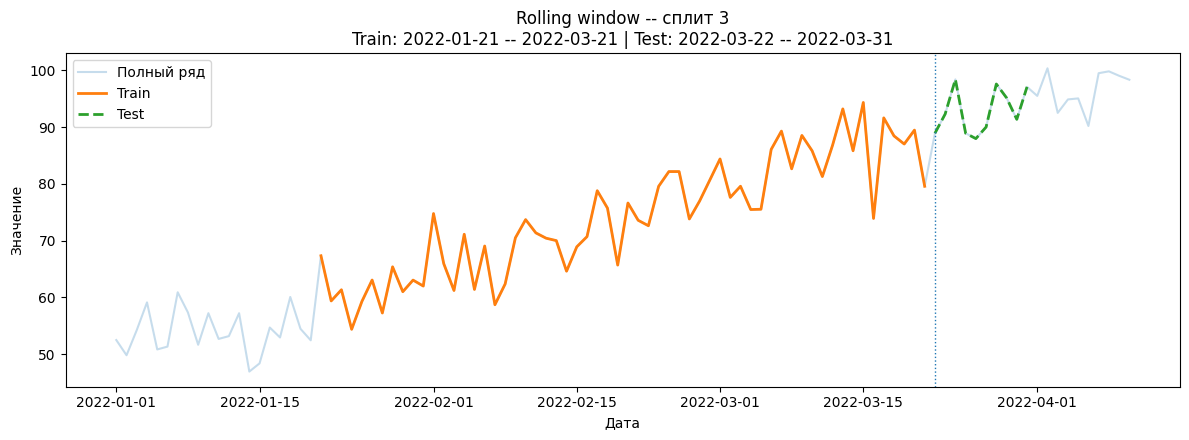

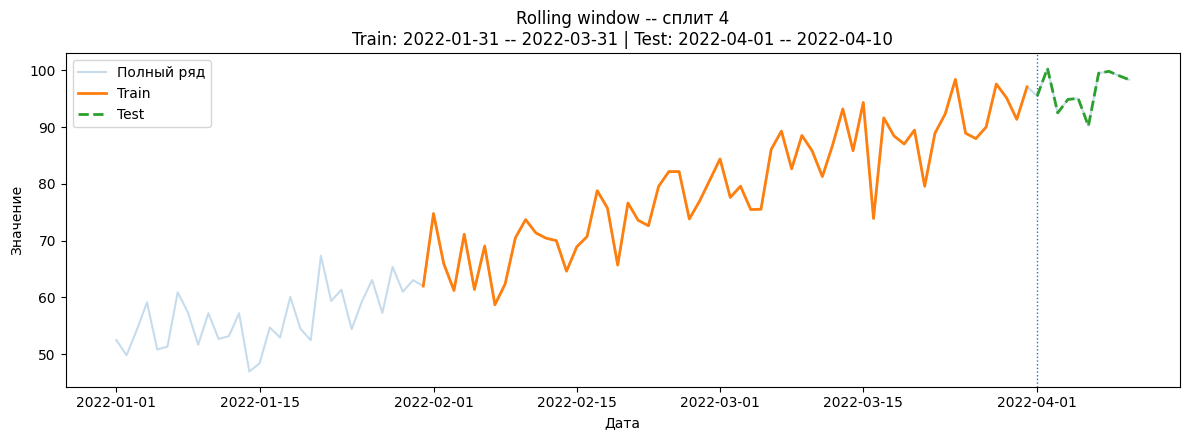

In [2]:
import matplotlib.pyplot as plt
 
window_size = 60  # Дней для обучения
horizon = 10  	# Дней для прогноза
 
# Соберем окна
splits = []
for start in range(0, len(df) - window_size - horizon + 1, horizon):
	train_window = df.iloc[start:start+window_size]
	test_window = df.iloc[start+window_size:start+window_size+horizon]
	splits.append((train_window, test_window))
 
# Рисуем первые четыре сплита
for i, (train_window, test_window) in enumerate(splits[:4], start=1):
	plt.figure(figsize=(12, 4.5))
	
	# Весь ряд — фоном
	plt.plot(df.index, df['sales'], alpha=0.25, label='Полный ряд')
	# Train
	plt.plot(train_window.index, train_window['sales'], linewidth=2, label='Train')
	# Test
	plt.plot(test_window.index, test_window['sales'], linewidth=2, linestyle='--', label='Test')
	# Вертикальная линия-раздел
	plt.axvline(test_window.index[0], linestyle=':', linewidth=1)
 
	plt.title(f'Rolling window -- сплит {i}\n'
          	f'Train: {train_window.index[0].date()} -- {train_window.index[-1].date()} | '
          	f'Test: {test_window.index[0].date()} -- {test_window.index[-1].date()}')
	plt.xlabel('Дата')
	plt.ylabel('Значение')
	plt.legend()
	plt.tight_layout()
	plt.show()

In [3]:
initial_train_size = 60
horizon = 10
 
for start in range(0, len(df) - initial_train_size - horizon + 1, horizon):
	train_window = df.iloc[:initial_train_size + start]
	test_window = df.iloc[initial_train_size + start : initial_train_size + start + horizon]
	print(f"Train: {train_window.index[0].date()} -- {train_window.index[-1].date()}")
	print(f"Test: {test_window.index[0].date()} -- {test_window.index[-1].date()}")
	print("-" * 40)

Train: 2022-01-01 -- 2022-03-01
Test: 2022-03-02 -- 2022-03-11
----------------------------------------
Train: 2022-01-01 -- 2022-03-11
Test: 2022-03-12 -- 2022-03-21
----------------------------------------
Train: 2022-01-01 -- 2022-03-21
Test: 2022-03-22 -- 2022-03-31
----------------------------------------
Train: 2022-01-01 -- 2022-03-31
Test: 2022-04-01 -- 2022-04-10
----------------------------------------


In [4]:
# Пример лагов
df['lag_1'] = df['sales'].shift(1)  # Вчерашнее значение
df['lag_7'] = df['sales'].shift(7)  # Значение неделю назад
 
df.head(10)

,sales,lag_1,lag_7
date,,,
2022-01-01,52.483571,NaN,NaN
2022-01-02,49.808678,52.483571,NaN
2022-01-03,54.238443,49.808678,NaN
2022-01-04,59.115149,54.238443,NaN
2022-01-05,50.829233,59.115149,NaN
2022-01-06,51.329315,50.829233,NaN
2022-01-07,60.896064,51.329315,NaN
2022-01-08,57.337174,60.896064,52.483571
2022-01-09,51.652628,57.337174,49.808678


In [5]:
df['day_of_week'] = df.index.dayofweek  # 0 — понедельник, 6 — воскресенье
df['month'] = df.index.month
df['is_weekend'] = (df.index.dayofweek >= 5).astype(int)
df.head()

,sales,lag_1,lag_7,day_of_week,month,is_weekend
date,,,,,,
2022-01-01,52.483571,NaN,NaN,5,1,1
2022-01-02,49.808678,52.483571,NaN,6,1,1
2022-01-03,54.238443,49.808678,NaN,0,1,0
2022-01-04,59.115149,54.238443,NaN,1,1,0
2022-01-05,50.829233,59.115149,NaN,2,1,0


In [7]:
import holidays
 
ru_holidays = holidays.Russia()
df['is_holiday'] = df.index.to_series().apply(lambda x: 1 if x in ru_holidays else 0)
df.head()

,sales,lag_1,lag_7,day_of_week,month,is_weekend,is_holiday
date,,,,,,,
2022-01-01,52.483571,NaN,NaN,5,1,1,1
2022-01-02,49.808678,52.483571,NaN,6,1,1,1
2022-01-03,54.238443,49.808678,NaN,0,1,0,1
2022-01-04,59.115149,54.238443,NaN,1,1,0,1
2022-01-05,50.829233,59.115149,NaN,2,1,0,1
